In [1]:
%run ../input/python-recipes/cidhtml.py
%run ../input/python-recipes/danfo_csv.py
idhtml('Data & Code Modules')

In [2]:
import sklearn as sl,pandas as pd,numpy as np,pylab as pl
from sklearn.inspection import plot_partial_dependence
from sklearn.datasets import make_regression
from sklearn.preprocessing import RobustScaler
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import HuberRegressor,Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
url='https://raw.githubusercontent.com/OlgaBelitskaya/'+\
    'machine_learning_engineer_nd009/master/'+\
    'Machine_Learning_Engineer_ND_P3/customers.csv'
customers=pd.read_csv(url)
columns=['Fresh','Milk','Grocery','Frozen',
         'Detergents_Paper','Delicatessen']
danfo_table_csv(url,columns,11)

In [4]:
n_samples=1000; rng=np.random.RandomState(123)
X1=rng.randn(n_samples,3)
noise=rng.normal(loc=0.,scale=.5,size=n_samples)
y1=(2*X1[:,0]+np.sin(3*np.pi*X1[:,0])-noise)

In [5]:
idhtml('Partial Dependence & Regression')

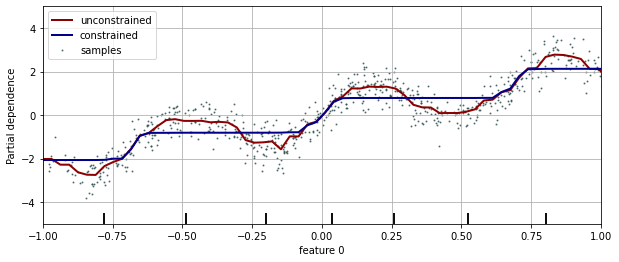

In [6]:
gbdt_no_cst=HistGradientBoostingRegressor().fit(X1,y1)
gbdt_cst=HistGradientBoostingRegressor(
    monotonic_cst=[1,0,0]).fit(X1,y1)
pl.rcParams['figure.figsize']=(10,4)
disp=plot_partial_dependence(
    gbdt_no_cst,X1,features=[0],feature_names=['feature 0'],
    line_kw={'linewidth':2,'color':'darkred','label':'unconstrained'})
plot_partial_dependence(
    gbdt_cst,X1,features=[0],ax=disp.axes_,
    line_kw={'linewidth':2,'color':'darkblue','label':'constrained'})
disp.axes_[0,0].plot(
    X1[:,0],y1,'o',ms=1,c='darkslategray',
    alpha=.7,zorder=-1,label='samples')
disp.axes_[0,0].set_ylim(-5,5); disp.axes_[0,0].set_xlim(-1,1)
pl.legend(); pl.grid()

In [7]:
idhtml('HuberRegressor vs Ridge & Strong Outliers')

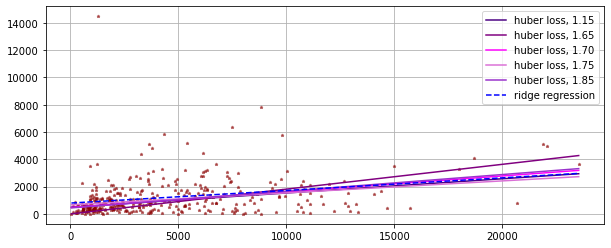

In [8]:
customers_cond=customers[customers<25000].dropna()
X=customers_cond.Milk.values.reshape(-1,1)
y=customers_cond.Delicatessen.values
pl.figure(figsize=(10,4))
pl.plot(X,y,'o',c='darkred',ms=3,marker='*',alpha=.5)
x=np.linspace(X.min(),X.max(),7)
colors=['indigo','purple','magenta',
        'orchid','darkorchid']
epsilon_values=[1.15,1.65,1.7,1.75,1.85]
for k,epsilon in enumerate(epsilon_values):
    huber=HuberRegressor(alpha=0.,epsilon=epsilon)
    huber.fit(X,y)
    coef_=huber.coef_*x+huber.intercept_
    pl.plot(x,coef_,colors[k],
            label='huber loss, %.2f'%epsilon)
ridge=Ridge(alpha=0.,random_state=0,normalize=True)
ridge.fit(X,y)
coef_ridge=ridge.coef_
coef_=ridge.coef_ *x+ridge.intercept_
pl.plot(x,coef_,'blue',ls='--',label='ridge regression')
pl.grid(); pl.legend(); pl.show()